In [2]:
!pip install -U -q ultralytics roboflow matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 42.6 MB/s eta 0:00:00


In [3]:
import os, yaml, shutil
from ultralytics import YOLO
from roboflow import Roboflow

rf = Roboflow(api_key="PFN4A7FKw5wg0Uw62akT")
project = rf.workspace("pram").project("ppe-detection-z3v2w")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE-Detection-2 in yolov8:: 100%|██████████| 6012/6012 [00:00<00:00, 7806.54it/s]


In [4]:
print("DATA:", os.path.join(dataset.location, "data.yaml"))
with open(os.path.join(dataset.location, "data.yaml")) as f:
    print(f.read())

DATA: /content/PPE-Detection-2/data.yaml
names:
- Hardhat
- Person
- Safety_Boots
- Safety_Gloves
- Safety_Mask
- Safety_Vest
nc: 6
roboflow:
  license: CC BY 4.0
  project: ppe-detection-z3v2w
  url: https://universe.roboflow.com/pram/ppe-detection-z3v2w/dataset/2
  version: 2
  workspace: pram
test: ../test/images
train: ../train/images
val: ../valid/images



## **Train YOLOv8**

In [5]:
model = YOLO("yolov8s.pt")
data_yaml_path = os.path.join(dataset.location, "data.yaml")
results = model.train(
    data=data_yaml_path,
    imgsz=640,
    epochs=70,
    batch=16,
    device=0,
    optimizer="AdamW",
    cos_lr=True,
    patience=15
)

Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/PPE-Detection-2/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=15, perspective=0.0, plots=True, pose

### **Evaluate**

In [6]:
metrics = model.val()
metrics

Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 854.0±274.4 MB/s, size: 37.9 KB)
val: Scanning /content/PPE-Detection-2/valid/labels.cache... 600 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 600/600 1.2Mit/s 0.0s
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 5, len(boxes) = 2292. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 38/38 3.9it/s 9.6s
                   all        600       2292      0.919      0.899       0.94      0.715
               Hardhat        357        383      0.965      0.966      0.985      0.858
                Person        269    

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c2e6b800770>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [12]:
import cv2
import matplotlib.pyplot as plt


image 1/1 /content/images.jpg: 480x640 1 Hardhat, 1 Person, 50.3ms
Speed: 2.7ms preprocess, 50.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/runs/detect/predict2
Annotated image saved to: /content/runs/detect/predict2/images.jpg


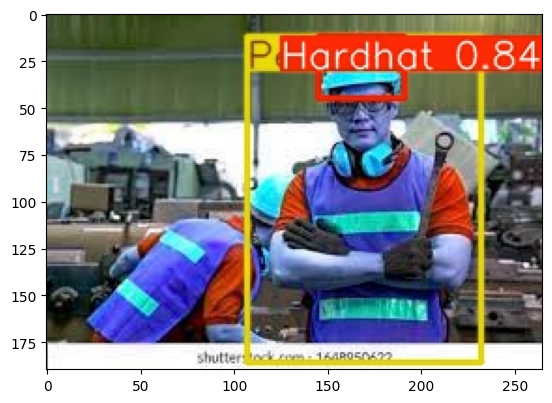

In [13]:
img_path = '/content/images.jpg'
results = model.predict(source=img_path, conf=0.5, save=True)

annotated_path = results[0].save_dir + "/" + results[0].path.split("/")[-1]
print("Annotated image saved to:", annotated_path)

img = cv2.imread(annotated_path)
plt.imshow(img)

## **Export to ONNX + download weights**

In [7]:
model.export(format="onnx", opset=12)
model.export(format="torchscript")

Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (21.5 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<=1.19.1', 'onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 14 packages in 173ms
Prepared 6 packages in 8.92s
Installed 6 packages in 404ms
 + colorama==0.4.6
 + coloredlogs==15.0.1
 + humanfriendly==10.0
 + onnx==1.19.1
 + onnxruntime-gpu==1.23.2
 + onnxslim==0.1.74

requirements: AutoUpdate success ✅ 10.1s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.1 opset 12...
ONNX: slimming with onnxslim 0.1.74...
ON

'/content/runs/detect/train/weights/best.torchscript'

In [8]:
# Copy artifacts to /content/models for easy download
os.makedirs("/content/models", exist_ok=True)
latest = model.ckpt_path if hasattr(model, "ckpt_path") else "runs/detect/train/weights/best.pt"
pt_out = latest
onnx_out = "runs/detect/train/weights/best.onnx"

In [9]:
!cp -v {pt_out} /content/models/
!cp -v {onnx_out} /content/models/
!ls -lah /content/models

'yolov8s.pt' -> '/content/models/yolov8s.pt'
'runs/detect/train/weights/best.onnx' -> '/content/models/best.onnx'
total 65M
drwxr-xr-x 2 root root 4.0K Nov 11 06:26 .
drwxr-xr-x 1 root root 4.0K Nov 11 06:26 ..
-rw-r--r-- 1 root root  43M Nov 11 06:26 best.onnx
-rw-r--r-- 1 root root  22M Nov 11 06:26 yolov8s.pt


In [10]:
test_model = YOLO(pt_out)
r = test_model.predict(source=os.path.join(dataset.location, "valid", "images"), conf=0.5, save=True)
r


image 1/600 /content/PPE-Detection-2/valid/images/00016_jpg.rf.b62a307718bc28d4d75f8ee9a6725553.jpg: 640x640 1 person, 16.5ms
image 2/600 /content/PPE-Detection-2/valid/images/00052_jpg.rf.7944593a4be0ab5874b8e831ffca8aa1.jpg: 640x640 1 person, 16.5ms
image 3/600 /content/PPE-Detection-2/valid/images/00085_jpg.rf.0eef0c2a13a9ab03ba038f1742a0c388.jpg: 640x640 1 person, 16.5ms
image 4/600 /content/PPE-Detection-2/valid/images/00091_jpg.rf.7b507e401f9059c8957ed22b71e6da95.jpg: 640x640 6 persons, 16.5ms
image 5/600 /content/PPE-Detection-2/valid/images/00098_jpg.rf.d06b09eaf92570cfa7036b7e0c1a5824.jpg: 640x640 2 persons, 17.0ms
image 6/600 /content/PPE-Detection-2/valid/images/00105_jpg.rf.f59973ec6bf39e533611bf76def14f23.jpg: 640x640 5 persons, 14.6ms
image 7/600 /content/PPE-Detection-2/valid/images/00182_jpg.rf.bfa6873acc9804763a08a87d5332cef3.jpg: 640x640 1 person, 16.8ms
image 8/600 /content/PPE-Detection-2/valid/images/00224_jpg.rf.e795ff63454f6d3b3064a43bb8c1149e.jpg: 640x640 5 per

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p